PLOTS 2D 

In [152]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
rc('font',family='serif')
import glob, os


In [153]:
def ReadFile(path):
    os.chdir(path)
    for file in glob.glob("existence*.txt"):
        existence_file = file
    data   = np.loadtxt(path+existence_file)
    lendata = len(data[:,0])
    
    j = 1
    for i in range(1,lendata):
        if data[i,0] < data[i-1,0]:
            break
        j = j+1
    nphi = j
    
    k = 1
    for i in range(1,lendata):
        if data[i,3] != data[i-1,3]:
            k = k+1
    nrho = k
    
    print('Number of points for central potential   : ', nphi)
    print('Number of points for central rest mass density   : ', nrho)
    
    phictmp   = np.array(np.array_split(data[:,0],nrho))
    phic = phictmp[0,:]
    rhotmp = data[:,3]
    rhoc   = np.zeros(nrho)
    
    for i in range(0,nrho):
        rhoc[i] = rhotmp[nphi*i]
    
    mass = np.array(np.array_split(data[:,2],nrho))
    
    return phic, rhoc, mass
    

fa   =  10
Number of points for central potential   :  25
Number of points for central rest mass density   :  25
Fixed mass value :  0.6172
Fixed mass value :  0.6174
Fixed mass value :  1.20805
Fixed mass value :  0.6337
Fixed mass value :  1.58608
Fixed mass value :  1.40618
Fixed mass value :  1.0889


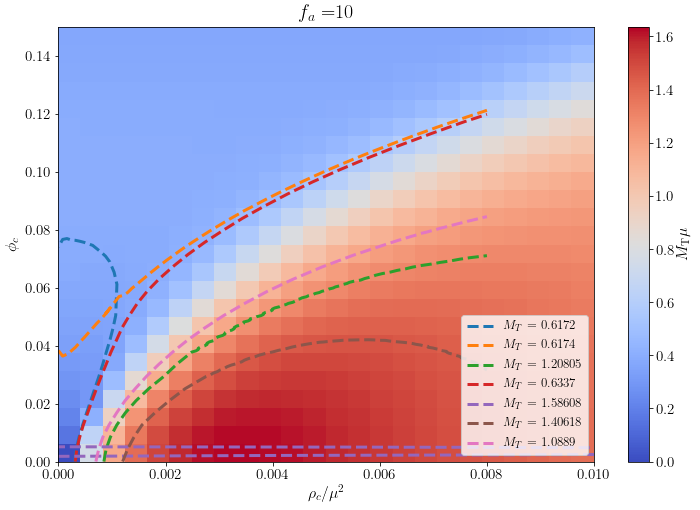

In [179]:
fa = 10

path = '/Users/miquelmiravet/Projects/IPAM_LA/axion-fermion-stars/fermion-axion-pywrap/wrappy/out/fa'+str(fa)+'/'
path_mass = '/Users/miquelmiravet/Projects/IPAM_LA/axion-fermion-stars/fermion-axion-pywrap/mass_curves/results/'

print('fa   = ',fa)

phic, rhoc, mass = ReadFile(path)
#mass = mass[:,1:]
mass = np.swapaxes(mass,0,1)
#phic = phic[1:]

fig, ax = plt.subplots(figsize = (12,8)) 
c       = ax.pcolor(rhoc,phic, mass,cmap = 'coolwarm')
cbar    = fig.colorbar(c, ax=ax)
cbar.set_label(label = r'$M_{\rm T}\mu$', size = 16, weight = 'bold')

for file in glob.glob(path_mass+"out_equalmass_*.txt"):
    filename = os.path.basename(file)
    mass = float(filename[14:-4]) 
    print('Fixed mass value : ', mass)
    data = np.loadtxt(file, skiprows = 3)
    phim = data[:,0]
    rhom = data[:,1]
    if mass != 1.58608 or mass !=1.40618 :
        ax.plot(rhom,phim,linestyle='dashed', linewidth = 3,  label = r'$M_T$ = '+str(mass))
    
ax.legend(loc = 'lower right',frameon = True, fontsize = 13)
ax.set_xlabel(r'$\rho_c/\mu^2$', fontsize = 16)
ax.set_ylabel(r'$\phi_c$', fontsize = 16)
ax.set_xlim([0,0.01])
ax.set_title(r'$f_a = $'+str(fa), fontsize = 20, fontweight= 'bold')
ax.tick_params(axis = 'both', labelsize = 15)
cbar.ax.tick_params(labelsize=15)



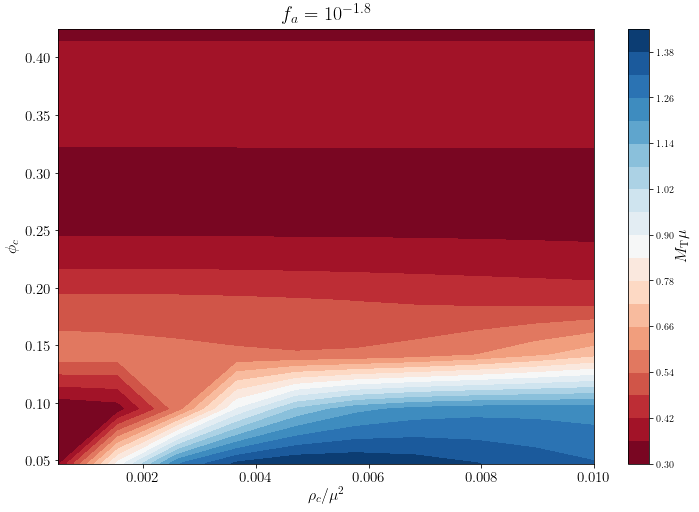

In [144]:
plt.figure(figsize=(12, 8))
plt.contourf(rhoc,phic, mass,20,cmap = 'RdBu')
plt.colorbar().set_label(label = r'$M_{\rm T}\mu$', size = 16, weight = 'bold')
plt.tick_params(labelsize=15)

plt.xlabel(r'$\rho_c/\mu^2$', fontsize = 16)
plt.ylabel(r'$\phi_c$', fontsize = 16)
plt.title(r'$f_a = 10^{-1.8}$', fontsize = 20, fontweight= 'bold')
plt.tick_params(axis = 'both', labelsize = 15)
